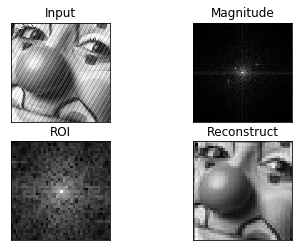

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 30 02:20:04 2017

@author: adafactor
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

mask = cv2.imread('line2.jpg', 0)
img = cv2.imread('noise.jpg',0)

#mask = cv.resize(mask, (300, 300), interpolation = cv.INTER_CUBIC)

#fmask = np.fft.fft2(mask)
fimg = np.fft.fft2(img)
fsImg = np.fft.fftshift(fimg)
w, h = fsImg.shape
radius = 20
cx, cy = w//2, h//2
roi = fsImg[cx-radius:cx+radius, cy-radius:cy+radius]

magnitude = np.log10(np.abs(fsImg)+10000)

inv = np.fft.ifftshift(roi)
inv  = np.abs(np.fft.ifft2(inv))

plt.subplot(221),plt.imshow(img, cmap='gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(np.log(np.abs(roi)+10000), cmap='gray')
plt.title('ROI'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(inv, cmap='gray')
plt.title('Reconstruct'), plt.xticks([]), plt.yticks([])

plt.show()